In [1]:
import matplotlib.pyplot as plt
import numpy as np
import glob
import os
%matplotlib widget

In [2]:
path = 'output' # data folder
data_files = sorted(glob.glob(os.path.join(path, "*.npz")), key=lambda x: int(x.split("_")[-1].split(".")[0]))
print(len(data_files))

164


In [3]:
data = np.concatenate([np.load(d)['data'] for d in data_files], axis=0).view('int8')
data.shape

(335872, 2)

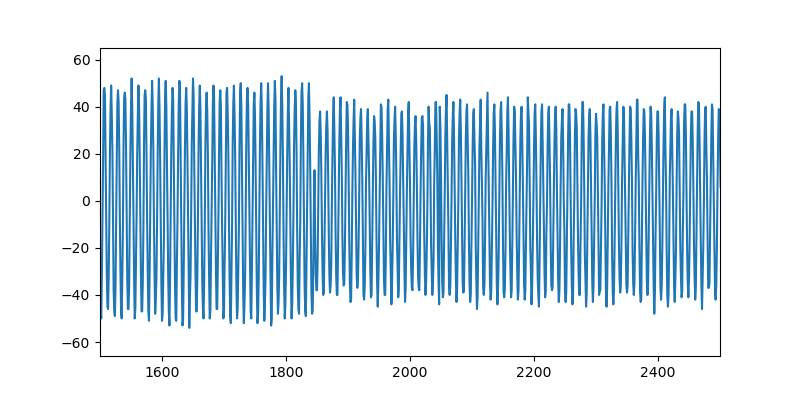

In [4]:
plt.figure(figsize=(8,4))
plt.plot(data[:,0])

# for checking specific number of files
#for i in range(1):
#    data = np.load(data_files[i])['data'].view('int8')
#    print(data.shape)
#    plt.plot(data[:,0])

plt.xlim(1500,2500)
plt.show()

In [ ]:
plt.close('all')